# **COMP 2211 Exploring Artificial Intelligence** #
## Lab 3 K-Nearest Neighbor ##

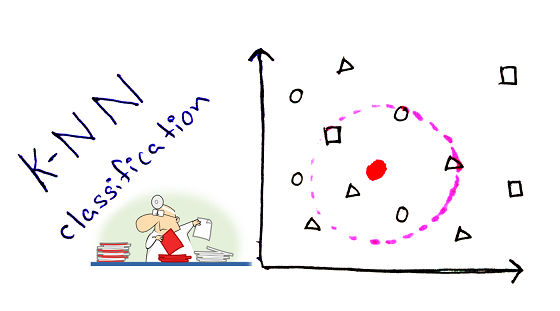

## **Review** ##
Before we start, let's have a quick recap of the lecture.

## **K-Nearest Neighbor** ##
It is a <font color="red">non-parametric algorithm</font> that performs classification prediction according to K-nearest data points in the training set.

### **Steps** ###
1. Prepare training data and test data.
2. Select a value K.
3. Determine which distance function to be used. 
>Euclidean distance is a commonly used distance function. For example, let $x^{Train}$ and $x^{Test}$ be the vector representation of a data sample in the training and test set, the euclidean distance between them can be computed as,
>$distance(x^{Train}, x^{Test}) = \sqrt{\mathrm{\sum_{i=1}^n (x_i^{Train}-x_i^{Test})^2}}$ 
4. Compute the distance of new data to its n training samples.
5. Sort the distances obtained and take the K-nearest data samples.
6. Assign the test sample to the class based on the majority votes of its K nearest neighbor.

### **Data Preprocessing - Standardization** ###
To prevent any attribute with relatively large value dominating the classification, standardization can be used.\
For $\mu$ as mean and $\sigma$ as standard deviation, the new data sample representation is computed as,
>$X_{new} = \frac{X - \mu}{\sigma}$ 

### **Outlier** ###

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
height = np.array([157, 155, 154, 153, 161, 156, 159, 154, 164, 159])
weight = np.array([55, 52, 54, 62, 68, 61, 61, 59, 57, 53])
size = ['M', 'M', 'M', 'M', 'L', 'M', 'L', 'L', 'L', 'L']
# cdict is a color dictionary stated by myself to convert T-shirt size label into a color label (which will be display accordingly in below plot)
cdict = {'M':'purple', 'L':'green'}

#### Visualization on the training data: ####

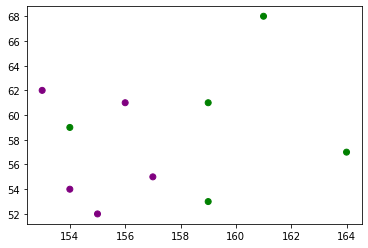

In [ ]:
# map helps to perform the action stated in lambda for each of the element in the given list
# in this example, for each element x in "size", it will be converted to color label according to cdict
#                             size    = ['M',        'M',      'M',      'M',      'L',     'M',      'L',     'L',     'L',     'L']
# list(map(lambda x: cdict[x], size)) = ['purple', 'purple', 'purple', 'purple', 'green', 'purple', 'green', 'green', 'green', 'green']
# outer list() operation is only to convert the object data type from map_object to list_object 
plt.scatter(height,weight, c=list(map(lambda x: cdict[x], size)))
plt.show()

Samples with **"L"** T-shirt size is highlighted in <font color="green">green</font>, while samples with **"M"** T-shirt size is highlighted in <font color="purple">purple</font>.

>Let's say we now need to predict the T-shirt size of a person with height 154cm and weight 58kg. 

#### Visualization of the testing sample on the training data: ####

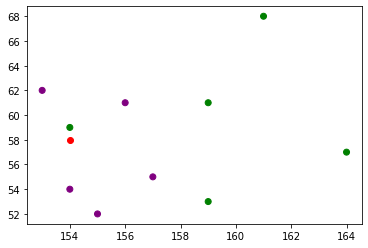

In [ ]:
plt.scatter(height,weight, c=list(map(lambda x: cdict[x], size)))
plt.scatter(154, 58, c='red')
plt.show()

The **testing sample** is highlighted in <font color="red">red</font> in the plot.

#### KNN Prediction ####

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
encoder = LabelEncoder()
label = encoder.fit_transform(size)
features = list(zip(height, weight))
def predict(k):
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(features, label)
  predicted = model.predict([[153, 58]])
  predicted = encoder.inverse_transform(predicted)
  return predicted

#### When k = 1, ####

In [ ]:
predict(k=1)

array(['L'], dtype='<U1')

#### When k = 3, ####

In [ ]:
predict(k=3)

array(['M'], dtype='<U1')

We can see low k-value is sensitive to class outliers, and a higher K-value is more resilient to class outliers as it considers more voters to decide prediction.